In [1]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# 2. Load the Dataset
df = pd.read_csv("Logistic_Regression_E-Commerce_Behavior_Dataset.csv")  

# Preview the data
df.head()

,Time_on_Site,Pages_Viewed,Referred_by_Ad,Previous_Purchases,Location_Score,Purchase_Made
0,2.346340,5,0,0,46.412341,0
1,15.050607,8,0,0,49.184772,1
2,6.583728,1,1,0,48.175819,0
3,4.564713,8,1,0,50.310760,1
4,0.848124,2,1,0,43.233292,0


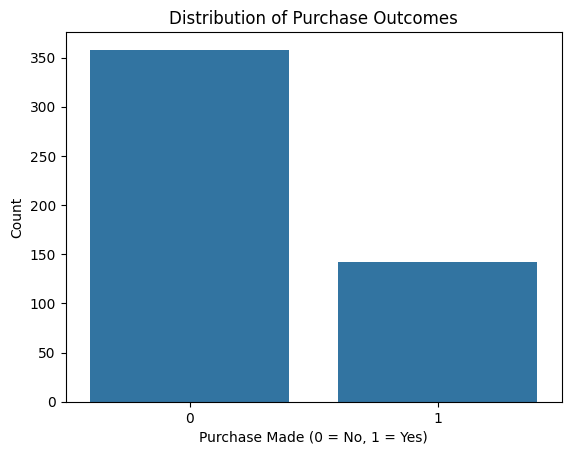

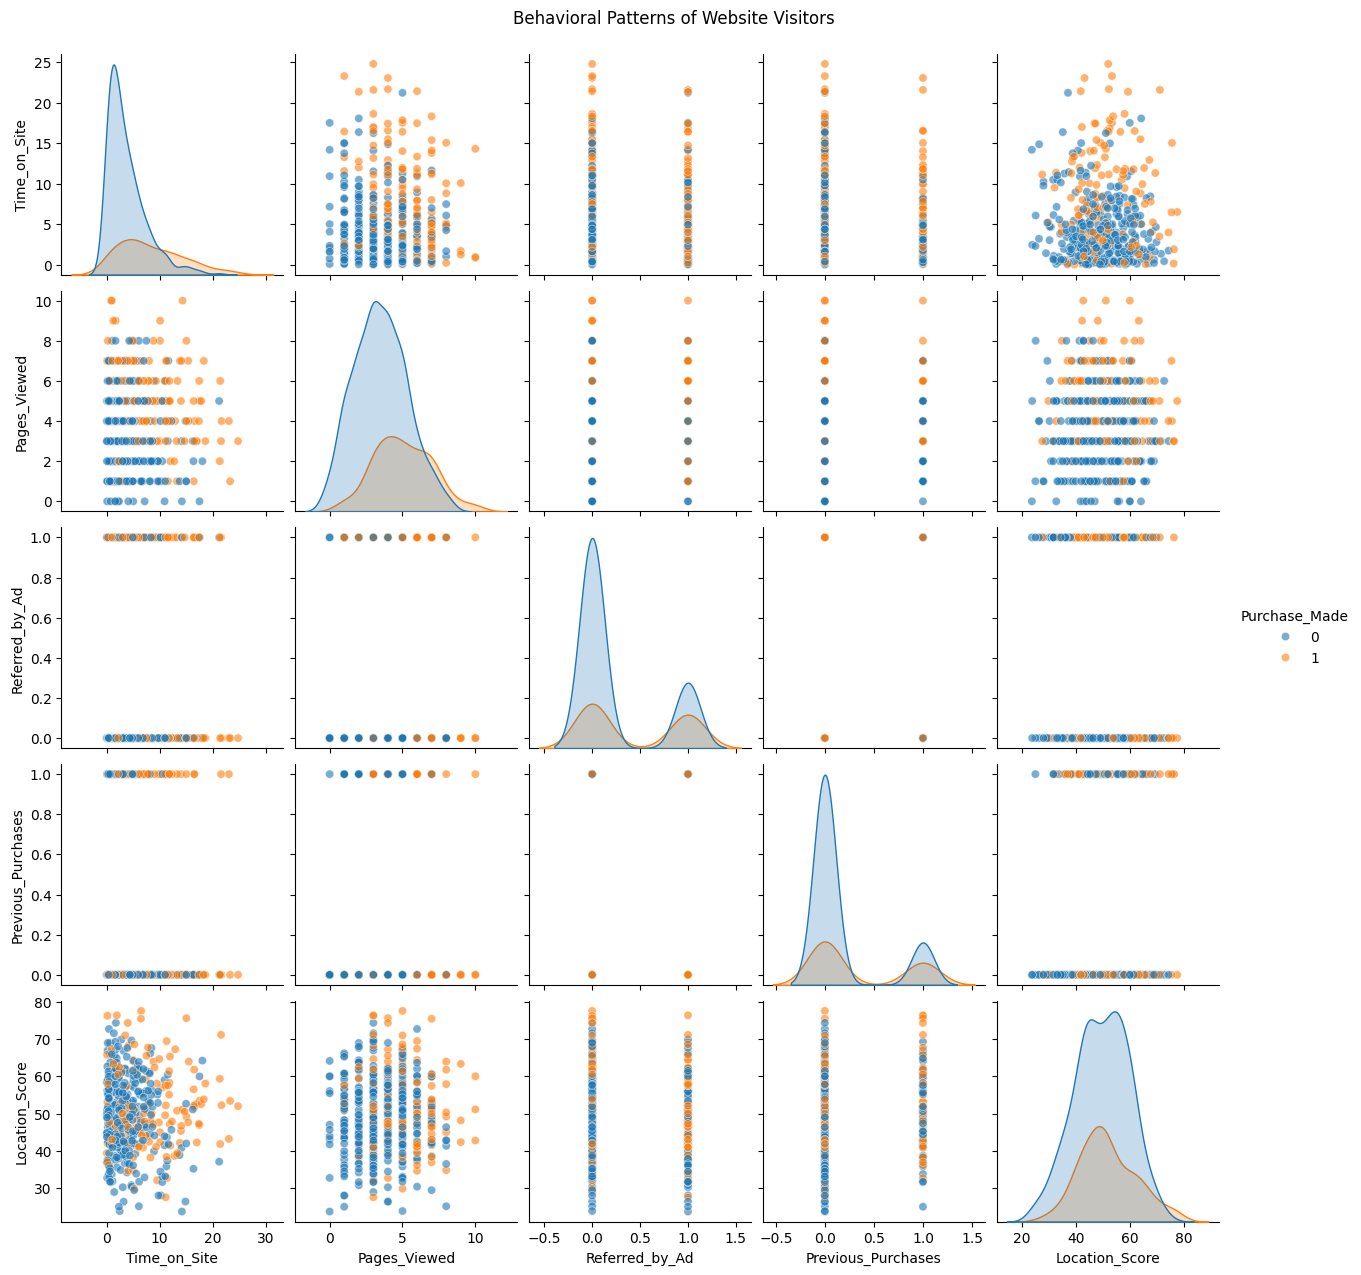

In [3]:
# 3. Exploratory Data Analysis (EDA)

# Check class balance
sns.countplot(x='Purchase_Made', data=df)
plt.title("Distribution of Purchase Outcomes")
plt.xlabel("Purchase Made (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Pairwise scatter plot
sns.pairplot(df, hue='Purchase_Made', plot_kws={'alpha': 0.6})
plt.suptitle("Behavioral Patterns of Website Visitors", y=1.02)
plt.show()

In [6]:
# 4. Prepare Features and Target
X = df[['Time_on_Site', 'Pages_Viewed', 'Referred_by_Ad', 'Previous_Purchases', 'Location_Score']]
y = df['Purchase_Made']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# 5. Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
3,Previous_Purchases,1.258415
2,Referred_by_Ad,1.239244
1,Pages_Viewed,0.673782
0,Time_on_Site,0.279336
4,Location_Score,0.036961


In [8]:
# 5. Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
3,Previous_Purchases,1.258415
2,Referred_by_Ad,1.239244
1,Pages_Viewed,0.673782
0,Time_on_Site,0.279336
4,Location_Score,0.036961


In [9]:
# 5. Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
3,Previous_Purchases,1.258415
2,Referred_by_Ad,1.239244
1,Pages_Viewed,0.673782
0,Time_on_Site,0.279336
4,Location_Score,0.036961


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       114
           1       0.74      0.47      0.58        36

    accuracy                           0.83       150
   macro avg       0.79      0.71      0.74       150
weighted avg       0.82      0.83      0.82       150

Confusion Matrix:


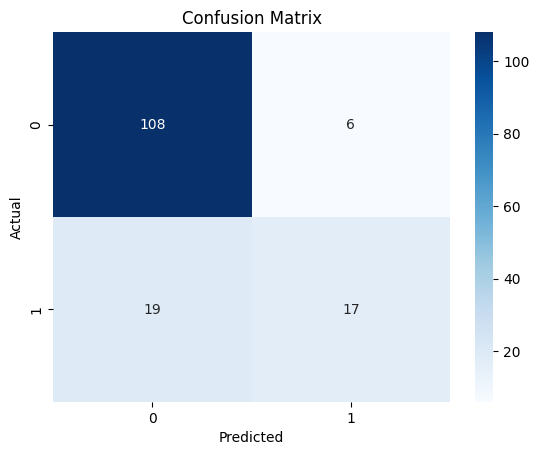

In [10]:
# 6. Evaluate the Model
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

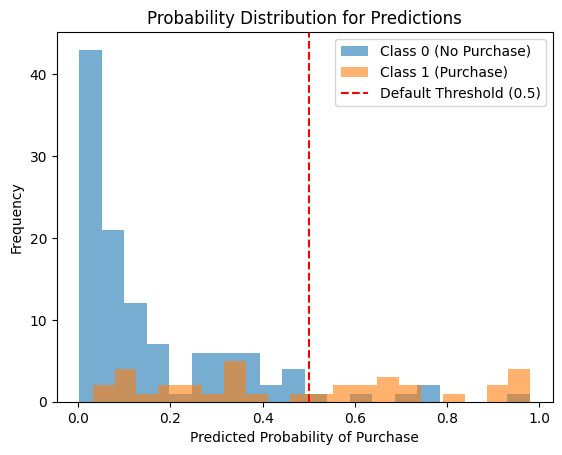

In [11]:
# 7. Probability Threshold Visualization

# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Plot the distribution of predicted probabilities
plt.hist(y_prob[y_test == 0], bins=20, alpha=0.6, label="Class 0 (No Purchase)")
plt.hist(y_prob[y_test == 1], bins=20, alpha=0.6, label="Class 1 (Purchase)")
plt.axvline(0.5, color='red', linestyle='--', label="Default Threshold (0.5)")
plt.xlabel("Predicted Probability of Purchase")
plt.ylabel("Frequency")
plt.title("Probability Distribution for Predictions")
plt.legend()
plt.show()

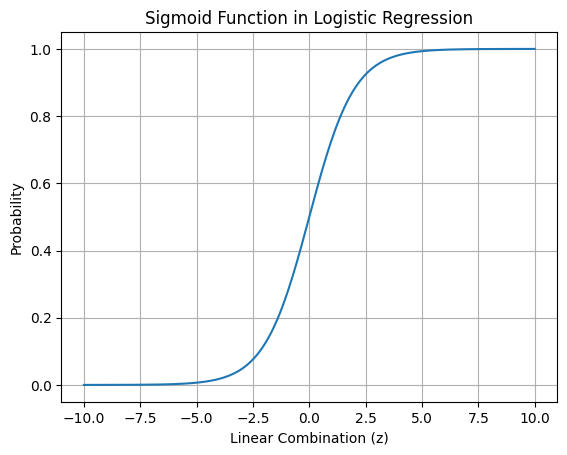

In [12]:
# 8. Interpret the Sigmoid Function
z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid)
plt.title("Sigmoid Function in Logistic Regression")
plt.xlabel("Linear Combination (z)")
plt.ylabel("Probability")
plt.grid(True)
plt.show()